# play with T-Test
reference at:  https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.stats.weightstats as ws

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams

%matplotlib inline
np.random.seed(8)
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 10,5
rcParams['font.size'] = 15
sns.set()

# We will practice with:
* Student's T-test (**scipy.stats.ttest_ind**)
* Paired Student's T-Test (**scipy.stats.ttest_rel**)


## Student's T-test (scipy.stats.ttest_ind)

In [49]:
# ttest_ind
#
# from reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html:
#
# Calculate the T-test for the means of two independent samples of scores.
# This is a two-sided test for the null hypothesis that 2 independent samples
# have identical average (expected) values. This test assumes that the populations
# have identical variances by default.

# Notes
# We can use this test, if we observe two independent samples from the same or
# different population, e.g. exam scores of boys and girls or of two ethnic groups.
# The test measures whether the average (expected) value differs significantly
# across samples.
# If we observe a large p-value, for example larger than 0.05 or 0.1,
# then we cannot reject the null hypothesis of identical average scores.
# If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%,
# then we reject the null hypothesis of equal averages.

In [50]:
# In other words 
# ttest_ind is attempting to show that b is different than a.
# It does this by hypothesizing they are the same and showing
# there is absolutely no evidence of this.

# in more detail...
# we have two distributions and we want to exclude any possibility of them being the same
# So we test for sameness (the null hypothesis) and
# if there is ANY evidence to support the null hypothesis then we cannot reject it.
# if there is absolutely no evidence to support the null hypothesis then we CAN reject it.
# Rejecting the null hypothesis says there is absolutely no evidence to support that the distributions are the same.
# in other words:
# p>0.05 means cannot reject hypothesis - they are possibly the same
# p<0.05 means CAN reject the hypothesis - there is absolutely no evidence to suggest they are the same

In [474]:
def run_ttest_ind(d1,d2):
    stat, p = stats.ttest_ind(a=d1, b=d2, equal_var=False, nan_policy='omit')
    if p > 0.05:
        msg = 'Probably the same distribution'
    else:
        msg = 'Probably different distributions'
    print('stat=%.3f, p=%.3f --> %s' % (stat, p, msg))

### We first investigate the effect of sample size - starting with 128 and decreasing to 2
here the mean is 0.5 and standard deviation is 2

In [475]:
data1 = np.random.normal(0.5, 2, 128)
data2 = np.random.normal(0.5, 2, 128)
run_ttest_ind(data1, data2)

stat=-1.495, p=0.136 --> Probably the same distribution


In [476]:
data1 = np.random.normal(0.5, 2, 64)
data2 = np.random.normal(0.5, 2, 64)
run_ttest_ind(data1, data2)

stat=1.118, p=0.266 --> Probably the same distribution


In [54]:
data1 = np.random.normal(0.5, 2, 32)
data2 = np.random.normal(0.5, 2, 32)
run_ttest_ind(data1, data2)

stat=-0.810, p=0.421 --> Probably the same distribution


In [55]:
data1 = np.random.normal(0.5, 2, 16)
data2 = np.random.normal(0.5, 2, 16)
stat, p = stats.ttest_ind(data1, data2)
run_ttest_ind(data1, data2)

stat=-0.658, p=0.516 --> Probably the same distribution


In [56]:
data1 = np.random.normal(0.5, 2, 8)
data2 = np.random.normal(0.5, 2, 8)
run_ttest_ind(data1, data2)

stat=0.960, p=0.354 --> Probably the same distribution


In [57]:
data1 = np.random.normal(0.5, 2, 4)
data2 = np.random.normal(0.5, 2, 4)
run_ttest_ind(data1, data2)

stat=1.402, p=0.246 --> Probably the same distribution


In [58]:
data1 = np.random.normal(0.5, 2, 2)
data2 = np.random.normal(0.5, 2, 2)
run_ttest_ind(data1, data2)
print(type(data1))

stat=0.455, p=0.724 --> Probably the same distribution
<class 'numpy.ndarray'>


# in summary:
if the distributions really do come from the same process then sample size plays almost no part in the results.

### a quick aside - take a look at one of the examples

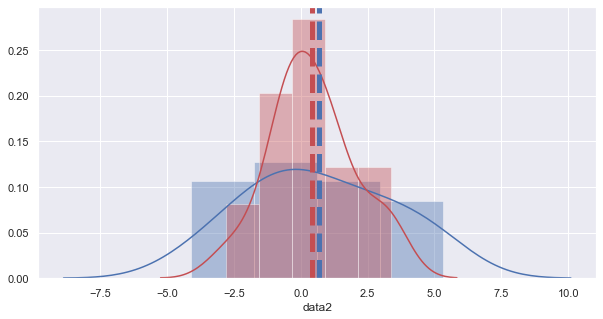

In [63]:
data1 = np.random.normal(0.5, 2, 20)
data2 = np.random.normal(0.5, 2, 20)
data12 = np.transpose(np.vstack((data1,data2)))
df = pd.DataFrame(
    columns=('data1', 'data2'),
    data=data12)

plt.figure()
ax1 = sns.distplot(df['data1'], color='b', kde=True, norm_hist=True)
ax2 = sns.distplot(df['data2'], color='r', kde=True, norm_hist=True)
plt.axvline(np.mean(df['data1']), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df['data2']),  color='r', linestyle='dashed', linewidth=5)

# Now investigate standard deviation
and its affect on results of ttest_ind

In [73]:
data1 = np.random.normal(0.5, 2, 16)
data2 = np.random.normal(0.5, 2, 16)
run_ttest_ind(data1, data2)

stat=0.866, p=0.393 --> Probably the same distribution


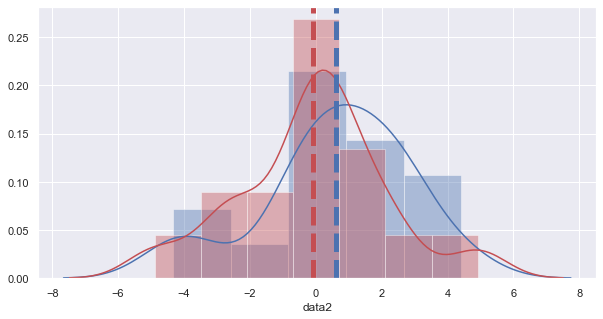

In [74]:
data12 = np.transpose(np.vstack((data1,data2)))
df = pd.DataFrame(
    columns=('data1', 'data2'),
    data=data12)

plt.figure()
ax1 = sns.distplot(df['data1'], color='b', kde=True, norm_hist=True)
ax2 = sns.distplot(df['data2'], color='r', kde=True, norm_hist=True)
plt.axvline(np.mean(df['data1']), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df['data2']),  color='r', linestyle='dashed', linewidth=5)

In [99]:
data1 = np.random.normal(0.5, 4, 16)
data2 = np.random.normal(0.5, 4, 16)
run_ttest_ind(data1, data2)

stat=-0.687, p=0.498 --> Probably the same distribution


In [112]:
data1 = np.random.normal(0.5, 8, 16)
data2 = np.random.normal(0.5, 8, 16)
run_ttest_ind(data1, data2)

stat=-1.674, p=0.105 --> Probably the same distribution


In [138]:
data1 = np.random.normal(0.5, 16, 16)
data2 = np.random.normal(0.5, 16, 16)
run_ttest_ind(data1, data2)

stat=0.434, p=0.668 --> Probably the same distribution


In [139]:
data1 = np.random.normal(0.5, 64, 16)
data2 = np.random.normal(0.5, 64, 16)
run_ttest_ind(data1, data2)

stat=0.418, p=0.679 --> Probably the same distribution


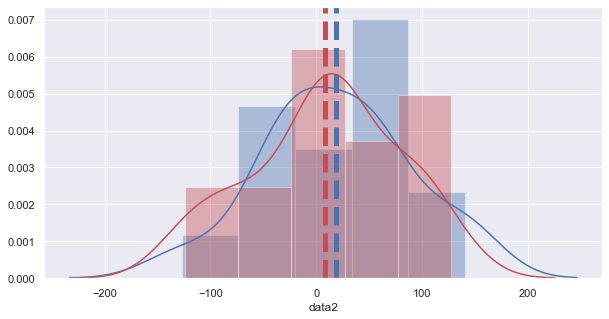

In [140]:
data12 = np.transpose(np.vstack((data1,data2)))
df = pd.DataFrame(
    columns=('data1', 'data2'),
    data=data12)

plt.figure()
ax1 = sns.distplot(df['data1'], color='b', kde=True, norm_hist=True)
ax2 = sns.distplot(df['data2'], color='r', kde=True, norm_hist=True)
plt.axvline(np.mean(df['data1']), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df['data2']),  color='r', linestyle='dashed', linewidth=5)

# in summary:
if the distributions really do come from the same process then with a sample size of 16 standard deviation does not affect the results

# Now investigate mean
# in fact - the above tests are not really valid as
they give distributions that we know are from the same source.

What ttest_ind is intends to test is that they are NOT from the same source,
so the only time the tests are conclusive is when the result is
"probably from different distributions".

We now go after that case


### starting with n=8

In [271]:
data1 = np.random.normal(0.5, 2, 8)
data2 = np.random.normal(0.6, 2, 8)
run_ttest_ind(data1, data2)

stat=-0.766, p=0.459 --> Probably the same distribution


above shows that with a difference in mean = 0.1, standard deviation = 2, sample size = 8 is not sufficient to show difference

In [286]:
data1 = np.random.normal(0.5, 2, 128)
data2 = np.random.normal(0.6, 2, 128)
run_ttest_ind(data1, data2)

stat=-0.735, p=0.463 --> Probably the same distribution


above shows that with a difference in mean = 0.1, standard deviation = 2, even a much larger sample size = 128 does not show difference

the problem is the large standard deviation relative to the difference in mean  (2.0 vs 0.1)

let's try with a reduced standard deviation, starting with sample size 8

In [332]:
data1 = np.random.normal(0.5, .2, 8)
data2 = np.random.normal(0.6, .2, 8)
run_ttest_ind(data1, data2)

stat=-1.674, p=0.117 --> Probably the same distribution


In [333]:
data1 = np.random.normal(0.5, .2, 30)
data2 = np.random.normal(0.6, .2, 30)
run_ttest_ind(data1, data2)

stat=-2.557, p=0.013 --> Probably different distributions


In [334]:
data1 = np.random.normal(0.5, .2, 128)
data2 = np.random.normal(0.6, .2, 128)
run_ttest_ind(data1, data2)

stat=-4.196, p=0.000 --> Probably different distributions


### so with the reduced standard deviation, increasing sample size really reduces the p-value
### in summary - if you want to prove one distribution is DIFFERENT from the other (ttest_ind) then you need a standard deviation that is on the order of the difference in means. 

# run some more tests with standard deviation = .1 and difference in means = .1

In [416]:
data1 = np.random.normal(0.5, .1, 8)
data2 = np.random.normal(0.6, .1, 8)
run_ttest_ind(data1, data2)

stat=-1.782, p=0.098 --> Probably the same distribution


In [428]:
data1 = np.random.normal(0.5, .1, 16)
data2 = np.random.normal(0.6, .1, 16)
run_ttest_ind(data1, data2)

stat=-2.598, p=0.015 --> Probably different distributions


In [442]:
data1 = np.random.normal(0.5, .1, 32)
data2 = np.random.normal(0.6, .1, 32)
run_ttest_ind(data1, data2)

stat=-4.411, p=0.000 --> Probably different distributions


### so in summary, with standard deviation = difference in mean, and sample size 32 will show significance
note we are using p=0.05 (95% confidence) in above testing.